In [ ]:
import pandas as pd

""" 
Analyis of beh effects of microstim.

10/16/23

"""


In [1]:
# %cd ..
# from tools.utils import * 
# from tools.plots import *
# from tools.analy import *
# from tools.calc import *
# from tools.analyplot import *
# from tools.preprocess import *
# from tools.dayanalysis import *

from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *
import pythonlib
from pythonlib.dataset.dataset import load_dataset, load_dataset_daily_helper
import pickle
import seaborn as sns
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Try loading a single dataset

Searching using this string:
/home/lucast4/code/drawmonkey/expt_metadat/*230511-*Luca.**
Found this many paths:
0
Searching using this string:
/home/lucast4/code/drawmonkey/expt_metadat_daily/*230511-*Luca.**
Found this many paths:
1
---
/home/lucast4/code/drawmonkey/expt_metadat_daily/primsingridrand8c-230511-Luca.yaml
Loading this dataset Luca primsingridrand8c 230511
Searching using this string:
/gorilla1/analyses/database/*Luca-*primsingridrand8c-*230511-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/gorilla1/analyses/database/BEH/*Luca-*primsingridrand8c-*230511-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/mnt/Freiwald_kgupta/kgupta/analyses/database/*Luca-*primsingridrand8c-*230511-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/mnt/Freiwald_kgupta/kgupta/analyses/database/BEH/*Luca-*primsingridrand8c-*230511-*/*dat*.pkl
-- S

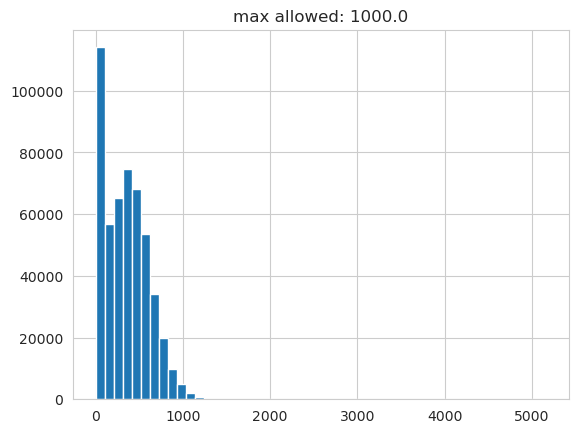

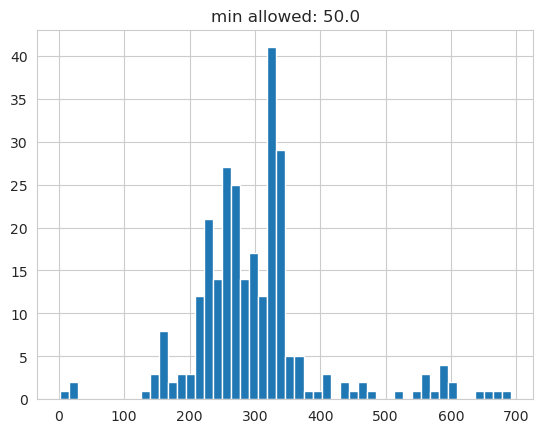

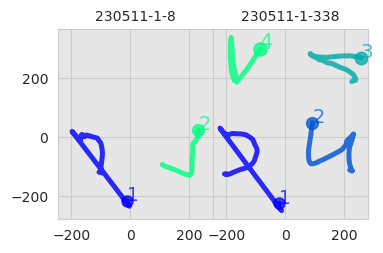

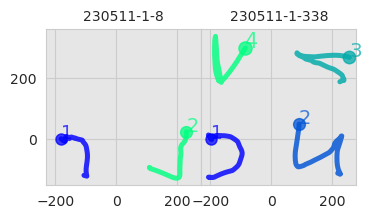

In [7]:
# Load a daily dataset

animal = "Luca"
DATE = "230511"

# animal = "Pancho"
# DATE = "230626"

D = load_dataset_daily_helper(animal, DATE)

In [ ]:
# load a main dataset
animal = "Diego"
expt = "gridlinecircleGOOD"
rulelist = None
D = load_dataset(animal, expt, rulelist)


#####

### Defining epochs

In [ ]:
from pythonlib.dataset.dataset_analy.microstim import preprocess_assign_stim_code

preprocess_assign_stim_code(D, {3:3, 4:4})

In [ ]:
D.Dat["microstim_epoch_code"].value_counts()

### Microstim

- Beh difference on stim?


In [ ]:
D.Dat["epoch"].value_counts()

In [ ]:
D.ml2_extract_raw()

In [ ]:
for ind in range(len(D.Dat)):
#     ind = 1
    PRINT = True
    codes_keep = [141, 142, 151] 
    print("---- ", ind)
    codes, times = D.ml2_utils_getTrialsBehCodes(ind, codes_keep, PRINT=PRINT)


### Timing of stim matches expectation? (behcode).


In [ ]:
# get beh code on eahc trial, and relate to stim in taskparams

ind = 506
D.blockparams_extract_single_taskparams(ind).keys()
D.blockparams_extract_single_taskparams(ind)["microstim_fix"]
# D.blockparams_extract_single_taskparams(ind)["microstim_stroke"]




In [ ]:
from pythonlib.dataset.dataset_analy.microstim import plot_overview_behcode_timings

sdir = "/tmp"
plot_overview_behcode_timings(D, sdir)

In [ ]:
# Easiest approach - define epochs based on stim.


In [ ]:
# classify each trial bsad on which area stimmed
for ind in range(len(D.Dat)):
D.blockparams_extract_single_taskparams(ind)["microstim_fix"]

In [ ]:
from pythonlib.dataset.dataset_analy.microstim import preprocess_assign_stim_code
preprocess_assign_stim_code(D, HACK=True)

### TIMING, e..g, SLOWER GAPS when stim preSMA?

In [ ]:
from pythonlib.dataset.dataset_analy.microstim import plot_motortiming

DS, DFTHIS = plot_motortiming(D, PLOT=True)


In [ ]:
# DEBUGGING

In [ ]:
for ind in range(len(D.Dat)):
    tmp = D.sequence_compute_each_task_stroke_only_one_beh(ind)
#     if tmp==False:
#         print(ind, tmp, D.Dat.iloc[ind]["success_binary_quick"])
    if tmp==False:
        print(ind, tmp)
        
    tmp1 = D.behclass_extract_taskstroke_inds_in_beh_order(ind, "first_touch")
    tmp2 = D.behclass_extract_taskstroke_inds_in_beh_order(ind, "each_beh_max_align")
    tmp3 = D.behclass_extract_taskstroke_inds_in_beh_order(ind, "first_touch_using_max_align")
    if not tmp1==tmp3:
        print(ind, tmp1, tmp2, tmp3)

In [ ]:
D.grammarmatlab_extract_beh_and_task(470, True)

In [ ]:
D.grammarmatlab_extract_beh_and_task(654, True)

In [ ]:
# Writing motor timing code ad hoc here.

In [ ]:
# OBSOLETE - since is incorporated above in  motor_timing scripts.

# Motor timing
list_reaction = []
for ind in range(len(D.Dat)):
    me = D.Dat.iloc[ind]["motorevents"]
    strokes = D.Dat.iloc[ind]["strokes_beh"]
    
    me["go_cue"]
    on = strokes[0][0,2]
    
    reaction_time = on - me["go_cue"]
    
    list_reaction.append(reaction_time)

D.Dat["reaction_time"] = list_reaction

from pythonlib.tools.snstools import rotateLabel

fig = sns.catplot(data=D.Dat, x="epoch", y="reaction_time", col="block", col_wrap=4, 
            kind="point", ci=68, aspect=1)
rotateLabel(fig)

sns.catplot(data=D.Dat, x="character", y="reaction_time", hue="epoch", 
            kind="point", ci=68, aspect=2, row="block")

sns.catplot(data=D.Dat, x="taskfeat_cat", y="reaction_time", hue="epoch", 
            kind="point", ci=68, aspect=2, row="block")

### Stim effect on behavior sequence?

##### Entire pipeline

In [ ]:
from pythonlib.dataset.dataset_analy.grammar import preprocess_dataset_matlabrule, pipeline_generate_and_plot_all


In [ ]:
pipeline_generate_and_plot_all(D)

##### Working wtih bm

In [ ]:
# DONE! is incorproated into "grammar" plots.

In [ ]:
from pythonlib.dataset.dataset_analy.grammar import preprocess_dataset_matlabrule, pipeline_generate_and_plot_all, preprocess_dataset_recomputeparses

In [ ]:
D.preprocessGood(params=["remove_baseline"])
D.sequence_tasksequencer_shapeseq_assign()
D.sequence_strokes_compute_01_sameness_status() # strokes01_sameness


In [ ]:
bm = preprocess_dataset_matlabrule(D, exclude_because_online_abort=True)

In [ ]:
bm = preprocess_dataset_recomputeparses(D, ONLY_ACTUAL_RULE=True)

In [ ]:
Dc = D.copy()
Dc.preprocessGood(params=["remove_baseline", "no_supervision"])
dfthis = Dc.Dat[Dc.Dat["exclude_because_online_abort"]==False].reset_index(drop=True)

In [ ]:
# tc = "231013-3-329"
# ind = D.Dat[D.Dat["trialcode"]==tc].index.tolist()[0]

# D.grammarmatlab_successbinary_print_summary()

# for ind in range(len(D.Dat)):
#     a = D.Dat.iloc[ind]["exclude_because_online_abort"]
#     b = D.grammarparsesmatlab_score_wrapper(ind, True)
#     if b=="online_abort_but_sequence_correct_so_far":
#         print(ind, a, b)

# for ind in range(len(D.Dat)):
#     tmp = D.sequence_compute_each_task_stroke_only_one_beh(ind)
#     D.Dat[""]
#     if tmp==False:
#         print(ind, tmp)

In [ ]:
savedir = "/tmp"
bm.plot_score_cross_prior_model_splitby_v2(split_by="taskfeat_cat", savedir=savedir)

##### Restrict analysis to errors after the first stroke.

problem with Pancho, stim biases to use default (right, shape A)?
    

In [ ]:
D.extract_beh_features()
D.epochset_extract_common_epoch_sets("character", epochset_col_name="epochsetchar")

In [ ]:
Dc = D.copy()
Dc.preprocessGood(params=["remove_baseline", "no_supervision"])
Dc.Dat = Dc.Dat[Dc.Dat["FEAT_num_strokes"]>1].reset_index(drop=True)
Dc.Dat = Dc.Dat[Dc.Dat["block"]==76].reset_index(drop=True)
Dc.Dat = Dc.Dat[Dc.Dat["epochsetchar"]==('AnBmCk2NODIR|TTL3-fgon', 'AnBmCk2NODIR|off', 'R|TTL3-fgon', 'R|off')].reset_index(drop=True)
print(len(Dc.Dat))


In [ ]:
from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping

dfres, fig = plot_45scatter_means_flexible_grouping(Dc.Dat, "microstim_epoch_code", "off", "TTL3-fgon", "epoch_orig", "FEAT_num_strokes", "character", False);

In [ ]:
sns.catplot(data=dfres, x="microstim_epoch_code", y="FEAT_num_strokes", hue="character", col="epoch_orig", kind="point")

In [ ]:
sns.catplot(data=Dc.Dat, y="FEAT_num_strokes", x="epoch_orig", hue="microstim_epoch_code", kind="bar", ci=68)


In [ ]:
sns.catplot(data=Dc.Dat, y="success_binary_quick", x="epoch_orig", hue="microstim_epoch_code", kind="bar", ci=68)

In [ ]:
##### Separate out errors of onset vs. 

##### Classify sequence errors [obsolete]

In [ ]:
This is replaced by stepwise.py module, which considers all actions, not just failures

In [ ]:
# See spreadsheet:
# https://docs.google.com/spreadsheets/d/1su3GL431EtBw_kqIsJdH9Y58Sk2egqRKAxdjRBop0bw/edit?usp=sharing
    

In [ ]:
ind = 1

In [ ]:
import random
# ind = random.choice(range(len(D.Dat)))
ind = random.choice(D.Dat[D.Dat["success_binary_quick"]==False].index.tolist())
print(ind)
print(" *********** ", D.grammarparsesmatlab_score_wrapper(ind, PRINT=True))
# ind = 710

PRINT_PLOT = True
D.grammarparses_classify_sequence_error(ind, PRINT_PLOT)


In [ ]:
def map_code_to_semantic_code(code):
    if code in ["ok", "rand"]:
        code_semantic = code
    elif code.find("-cls")>=0:
        # then go with simplest explanation, call this a mistake of
        # going to closest stroke.
        code_semantic = "close"
    elif code.find("-rlo")>=0:
        # then this is other rule.
        code_semantic = "rlo_notclose"
    elif code.find("shp")>=0:
        # then this is same shape (i.e., 
        code_semantic = "shp_notclose"
    else:
        print(code)
        assert False, "what to call it?"
    return code_semantic


In [ ]:
# Collect across all trials, and plot
res = []
labels = []
labels_sema = []

for ind in range(len(D.Dat)):
    resthis = D.grammarparses_classify_sequence_error(ind)
    res.append(resthis)
    
    # collect labels
    lab, lab_sema = _error_label_convert_to_code(resthis)    
    labels.append(lab)
    labels_sema.append(lab_sema)
    
D.Dat["sequence_label"] = labels
D.Dat["sequence_label_semantic"] = labels_sema



In [ ]:
D.grouping_get_inner_items("sequence_label_semantic", "sequence_label")

In [ ]:

def _error_label_convert_to_code(resthis):
    list_keys = ['error_same_shape', 'error_chose_closer', 'rule_other_correct', 'rule_other_reinitiated']
    _map_key_to_code = {
        'error_same_shape':'shp',
        'error_chose_closer':'cls',
        'rule_other_correct':'rlo',
        'rule_other_reinitiated':'rlo'
    }
    
    if resthis["correct"]:
        label = "ok"
    else:
        label = ""
        for k in list_keys:
            if resthis[k]:
                label+=f"-{_map_key_to_code[k]}"
        if len(label)==0:
            label = "rand"
    
    # also convert to semantic code.
    label_sema = map_code_to_semantic_code(label)
    return label, label_sema
    

In [ ]:
from pythonlib.tools.pandastools import convert_to_2d_dataframe

Dc = D.copy()
Dc.preprocessGood(params=["remove_baseline", "no_supervision"])
dfthis = Dc.Dat[Dc.Dat["exclude_because_online_abort"]==False].reset_index(drop=True)

dfthis_2d, fig, ax, rgba_values = convert_to_2d_dataframe(dfthis, "sequence_label", "epoch", plot_heatmap=True, norm_method="col_div");


In [ ]:
from pythonlib.tools.pandastools import  expand_categorical_variable_to_binary_variables
SEQUENCE_VAR = "sequence_label_semantic"
SEQUENCE_VAR = "sequence_label"
dflabels = expand_categorical_variable_to_binary_variables(D.Dat, SEQUENCE_VAR, ["trialcode", "epoch"])



In [ ]:
sns.catplot(data=dflabels, x=SEQUENCE_VAR, y="value", hue="epoch", kind="point", errorbar=('ci', 68), aspect=1.5)


In [ ]:
# # melt into long form
# from pythonlib.tools.pandastools import unpivot
# 
# unpivot(dfthis_2d, id_vars=["epoch", "trialcode"], value_vars=[]
# code = "-cs_rlo"
# code.find("-cls")

In [ ]:
# Plot example trials with a given rule code.
codethis = "-rlo-rlo"
inds = D.Dat[D.Dat["sequence_label"]==codethis].index.tolist()
i = inds[-1]
D.grammarmatlab_extract_beh_and_task(i, True)


#### [GOOD] For each action, classify it (and also note the possible transitions).

##### Sanity check that extract actions are correct

In [ ]:
# RESULT (12/3/23) - GOOD! everything is as expected.

In [ ]:
from pythonlib.grammar.stepwise import preprocess_plot_actions
df_actions, df_actions_trial, Dc, Params = preprocess_plot_actions(D, saveon=True, cleanup_actions=True)

##### Debug stepwise results

In [ ]:
# Pick random trial, print its actions. And plot its behavior and task.

# METHOD: 
# - each call gives a new random trial.
# - check byu eye that each timesteps's "context" is correct. and the choice tuple.

if True:
    import random
    ind = random.choice(range(len(D.Dat)))
    # ind = random.choice(D.Dat[D.Dat["success_binary_quick"]==False].index.tolist())
else:
    # hand enter tc of interest
    ind = D.Dat[D.Dat["trialcode"]=="231120-2-417"].index.item()
    
# print(ind)
print(" *********** ", D.grammarparsesmatlab_score_wrapper(ind, PRINT=True))
# ind = 710

# PRINT_PLOT = True
# D.grammarparses_classify_sequence_error(ind, PRINT_PLOT)
g = D.grammarparses_print_plot_summarize(ind)

tc = D.Dat.iloc[ind]["trialcode"]

print(D.Dat.iloc[ind]["supervision_stage_concise"])
display(df_actions[df_actions["trialcode"]==tc])
display(df_actions_trial[df_actions_trial["trialcode"]==tc])



##### For all cases where fail becuase bias to direction rule, what direction did he actually move?
ie argue against directional bias

In [ ]:
(df_actions_trial["epoch"]=="AnBmCk2|off")

In [ ]:
a = (df_actions_trial["epoch"]=="AnBmCk2|off")
b = (df_actions_trial["trial_sequence_outcome"]=="(False, True, False, False)")
c = (df_actions_trial["trial_sequence_outcome"]=="(True, True, False, False)")


In [ ]:
df_actions_sub.iloc[i]["taskinds_features"]

In [ ]:
df_actions

In [ ]:
df_actions_sub.iloc[i]["taskinds_features"]

In [ ]:
df_actions

In [ ]:
if False:
    # version 1
    a = df_actions["epoch_orig"]=="AnBmCk2"
    b = df_actions["choice_correct"]==False
    c = df_actions["choice_code"]==(False, True, False, False)
    d = df_actions["choice_code"]==(True, True, False, False)
    df_actions_sub = df_actions[a & b & (c | d)].reset_index(drop=True)
    # df_actions_sub = df_actions[a & b & (c)].reset_index(drop=True)
elif True:
    # version 2 - taking all errors.
    a = df_actions["epoch_orig"]=="AnBmCk2"
    b = df_actions["choice_correct"]==False
    df_actions_sub = df_actions[a & b].reset_index(drop=True)
else:
    a = df_actions["epoch_orig"]=="L"
    b = df_actions["choice_correct"]==False
    df_actions_sub = df_actions[a & b].reset_index(drop=True)

DEBUG = False

list_xy = []
list_stim = []
for i in range(len(df_actions_sub)):
    taskind_beh = df_actions_sub.iloc[i]["taskind_beh"]    
    taskind_features = df_actions_sub.iloc[i]["taskinds_features"]
    tmp = [f for f in taskind_features if f["taskind"]==taskind_beh]
    assert len(tmp)==1
    featdict = tmp[0]
    
    x = featdict["trans_prev_beh"][0]
    y = featdict["trans_prev_beh"][1]
        
    list_xy.append((x,y))
    list_stim.append(df_actions_sub.iloc[i]["microstim_epoch_code"])
    
    if DEBUG and random.random()<0.05:
        print("Compare the x and y to plot (trans to last stroke)")
        print(x,y)
        tc = df_actions_sub.iloc[i]["trialcode"]
        ind = D.index_by_trialcode(tc)
        D.plotSingleTrial(ind)
        assert False
        
list_stim = np.array(list_stim)
list_xy = np.array(list_xy)
    
# Convert xy to angles
from pythonlib.tools.vectools import get_angle
list_angle = [get_angle(v) for v in list_xy]



In [ ]:
from pythonlib.tools.nptools import bin_values_categorical_factorize
list_stim_ints = bin_values_categorical_factorize(list_stim)

fig, axes = plt.subplots(2,2)

xs = list_xy[:,0]
ys = list_xy[:,1]

# ax.plot(xs, ys, "ok")
ax = axes.flatten()[0]
ax.scatter(xs, ys, c=list_stim_ints)
ax.axvline(0)
ax.axhline(0)
# ax.set_xlabel("")

ax = axes.flatten()[1]
ax.hist2d(xs, ys, bins=8)
ax.axvline(0)
ax.axhline(0)
# ax.set_title("translation to last stroke when fail during AnBm, in manner that looks like DIR")


plt.suptitle("translation to last stroke when fail during AnBm, in manner that looks like DIR")


list_stimval = list(set(list_stim))
fig, axes = plt.subplots(2,2)
assert len(list_stimval)<=4, "Update plot"

ax = axes.flatten()[2]
for ax, stimval in zip(axes.flatten(), list_stimval):
    ax.hist(xs[list_stim==stimval], bins=8)
    ax.set_title(stimval)
    ax.set_xlabel("x translkations")


list_stimval = list(set(list_stim))
fig, axes = plt.subplots(2,2)
assert len(list_stimval)<=4, "Update plot"

ax = axes.flatten()[2]
for ax, stimval in zip(axes.flatten(), list_stimval):
    ax.hist(ys[list_stim==stimval], bins=8)
    ax.set_title(stimval)
    ax.set_xlabel("y translkations")



##### Entire pipelines

In [ ]:
# instead of epochset using char-seq, use char, to allow getting both rules.
D.Dat["epochset"].value_counts()

In [ ]:
from pythonlib.grammar.stepwise import preprocess_plot_actions


preprocess_plot_actions(D)
# Separate for each epochset

list_epochset = D.Dat["epochset"].unique().tolist()
nmin = 10
for es in list_epochset:
    Dc = D.copy()
    Dc.Dat = Dc.Dat[Dc.Dat["epochset"]==es].reset_index(drop=True)
    if len(Dc.Dat)>nmin:
        preprocess_plot_actions(Dc, suffix=f"epochset-{es}")
            
D.trialcode_tuple_extract_assign()
# find the middle trial
list_tc = sorted(D.Dat["trialcode_tuple"].tolist())
n = len(list_tc)
tc_mid = list_tc[int(n/2)]

# First half
Dc = D.copy()gm
Dc.Dat = Dc.Dat[Dc.Dat["trialcode_tuple"]<=tc_mid].reset_index(drop=True)
preprocess_plot_actions(Dc, suffix=f"splitbytime_half1")

# Second half
Dc = D.copy()
Dc.Dat = Dc.Dat[Dc.Dat["trialcode_tuple"]>tc_mid].reset_index(drop=True)
preprocess_plot_actions(Dc, suffix=f"splitbytime_half2")



##### Stepwise actions

In [ ]:
from pythonlib.dataset.dataset_analy.grammar import plot_stepwise_actions
plot_stepwise_actions(D)

In [ ]:
ind = 100
list(range(len(D.Dat.iloc[ind]["strokes_task"])))

In [ ]:
D.taskclass_tokens_extract_wrapper()

In [ ]:
##### Specifically ask about cases with same shape different location.

# same shape diff location.
# 

In [ ]:
df_actions["choice_code"]

In [ ]:
##### Stats on these distributions

In [ ]:
# Conclusion:

# 2) Get weights for prob of choosing an action given some state.
# - i.e., feature weights for each action, and log-linear model giving prob of picking each action.
# - to do this, at each stroke index, consider the entire space of possible actions. Each of those timesteps provides a single datapoint
# (i.e.,, multiple options)b 


##### Classify tasks by same first stroke, etc

In [ ]:
D.Dat = D.Dat[D.Dat["session"]==1].reset_index(drop=True)

In [ ]:
map_epochset_trialcode_0 = D.epochset_extract_wrapper("same_beh_first_stroke", 
                                                     only_keep_epochsets_containing_all_epochs=True,
                                                     exclude_leftover=True)
map_epochset_trialcode_0

In [ ]:
list(map_epochset_trialcode_0.values())

In [ ]:
D.sequence_strokes_compute_01_sameness_status()

In [ ]:
D.Dat["strokes01_sameness"].value_counts()

##### Tempo/sequeqncing - plot waterfall

In [ ]:
groupdict = D.grouping_get_inner_items("epochset")

In [ ]:
from pythonlib.drawmodel.strokePlots import plotDatWaterfallWrapper

assert False, "todo:"
Alignt to go.
# group by epchset (or epochset x char).

strokes_list = D.Dat["strokes_beh"].tolist()[:5]
ylabels = D.Dat["epoch"].tolist()[:5]
fig, ax = plt.subplots(figsize=(5,2))

plotDatWaterfallWrapper(strokes_list, ax=ax, ylabels=ylabels)


##### Timecourse of success, plotted separately for each rule

In [ ]:
df = D.Dat[D.Dat["exclude_because_online_abort"]==False]
sns.relplot(data=df, x="tvalfake", row="epoch", y="success_binary_quick", height=3, aspect=2, alpha=0.2)

In [ ]:
# Plot timecourse, split in diff ways
from pythonlib.tools.plottools import savefig
split_by = "taskfeat_cat"
sdir = "/tmp"
list_levels = D.Dat[split_by].unique().tolist()
for lev in list_levels:
    df = D.Dat[(D.Dat["exclude_because_online_abort"]==False) & (D.Dat[split_by]==lev)]
    fig=sns.relplot(data=df, x="tvalfake", col="epoch", col_wrap=3, y="success_binary_quick", 
                hue="session",
                height=3, aspect=3, alpha=0.25)
    savefig(fig, f"{sdir}/timecourse-splitby_{split_by}-lev_{lev}.pdf")            


In [ ]:
df = D.Dat[D.Dat["exclude_because_online_abort"]==False].reset_index(drop=True).copy()
df["success_binary_quick_int"] = np.array(df["success_binary_quick"].values, dtype=int)

In [ ]:
from pythonlib.tools.snstools import timecourse_overlaid
timecourse_overlaid(df, "success_binary_quick_int")

##### Trial immediately after stim -- failures?

In [ ]:
from pythonlib.dataset.dataset_analy.grammar import plot_trial_by_trial, plot_binned_by_time

In [ ]:
"microstim_epoch_code" in bm.DatLong.columns

In [ ]:
plot_binned_by_time(D, "/tmp")

In [ ]:
plot_trial_by_trial(D, "/tmp")

##### Comparing start and end of a stim session

In [ ]:
# incorporated into grammar.py

In [ ]:
# # bin trials and assing to dataframe
# nbins = 8
# from pythonlib.tools.nptools import bin_values

# list_sess = dfthis["session"].unique().tolist()
# for sess in list_sess:
#     dfthissess = dfthis[dfthis["session"]==sess].reset_index(drop=True)

#     # sort by trial
#     dfthissess = dfthissess.sort_values(by="trial")
    
#     vals = dfthissess["trial"].tolist()
#     timebins = bin_values(vals, nbins)
#     dfthissess["trial_binned"] = timebins

#     y = "success_binary_quick"
#     sns.catplot(data=dfthissess, x="trial_binned", y=y, hue="epoch", row="epochset", kind="point", ci=68)

##### Split by stim magnitude current (uA)

In [ ]:
bm.plot_score_cross_prior_model_splitby(split_by="epochset", sdir="/tmp")

In [ ]:
bm.DatLong["trial"]

In [ ]:
trial_range = [219, 569] # high current
dfthis = bm.DatLong[(bm.DatLong["trial"]>=trial_range[0]) & (bm.DatLong["trial"]<=trial_range[1])].reset_index(drop=True)

In [ ]:
bm.plot_score_cross_prior_model_splitby(split_by="epochset", sdir="/tmp", df=dfthis)

In [ ]:
bm.stats_score_permutation_test(split_plots_by="epochset", savedir="/tmp", nperms=500, df=dfthis,
                               INDEX=None)

##### binomial test

In [ ]:
dfthis["epoch"].unique().tolist()

In [ ]:
dfthis["epochset"].unique()

In [ ]:
print(len(dfthis))
# dfthis = dfthis[dfthis["epochset"] ==  ('same', 'llCV3b|TTL3-fgon', 'llCV3b|off')].reset_index(drop=True)
dfthis = dfthis[dfthis["epochset"] ==  ('same', 'llCV3b|TTL3-fgon', 'llCV3b|TTL4-fgon', 'llCV3b|off')].reset_index(drop=True)
print(len(dfthis))

In [ ]:
vals_off = dfthis[dfthis["epoch"]=="llCV3b|off"]["success_binary_quick"]
p_off = np.mean(vals_off)
p_off

In [ ]:
# vals_stim = dfthis[dfthis["epoch"]=="llCV3b|TTL3-fgon"]["success_binary_quick"]
vals_stim = dfthis[dfthis["epoch"]=="llCV3b|TTL4-fgon"]["success_binary_quick"]
vals_stim
p_stim = np.mean(vals_stim)
print(p_stim)

In [ ]:
from scipy.stats import binomtest
binomtest(sum(vals_stim==1), len(vals_stim), p=p_off)

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

count = [sum(vals_stim), sum(vals_off)]
nobs = [len(vals_stim), len(vals_off)]

z, p = proportions_ztest(count, nobs, alternative="smaller")
print(z, p)

##### Classifying tasks by their shape and location configs

In [ ]:
from pythonlib.dataset.modeling.discrete import tasks_categorize_based_on_rule_mult, tasks_categorize_based_on_rule
tasks_categorize_based_on_rule_mult(D)


In [ ]:
D.taskclass_shapes_loc_configuration_assign_column()

In [ ]:
D.Dat["taskconfig_loc"].value_counts()

In [ ]:
# for each location config, plot it
list_loc_cfg = sorted(D.Dat["taskconfig_loc"].unique().tolist())

SIZE=2
ncols = 4
nrows = int(np.ceil(len(list_loc_cfg)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*SIZE, nrows*SIZE))
for ax, locs in zip(axes.flatten(), list_loc_cfg):
    for lc in locs:
        ax.plot(lc[0], lc[1], "ok")
    print(locs)

In [ ]:
# map from location to code (1,2,3,... starting from bottom left)

list_loc_cfg
list_loc_flat = []
for x in list_loc_cfg:
    for xx in x:
        list_loc_flat.append(xx)
        
list_loc_flat = sorted(set(list_loc_flat), key=lambda x: (x[1], x[0]))

map_loc_code = {}
map_code_loc = {}
for i, loc in enumerate(list_loc_flat):
    map_loc_code[loc]=i+1
    map_code_loc[i+1]=loc

# Rename
list_loccode = []
for ind in range(len(D.Dat)):
    list_loccode.append(tuple(sorted([map_loc_code[x] for x in D.Dat.iloc[ind]["taskconfig_loc"]])))
    
D.Dat["taskconfig_loc_code"] = list_loccode

In [ ]:
map_loc_code

In [ ]:

# for each location config, plot it
list_loc_cfg = sorted(D.Dat["taskconfig_loc"].unique().tolist())

SIZE=2
ncols = 4
nrows = int(np.ceil(len(list_loc_cfg)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*SIZE, nrows*SIZE),
                        sharex=True, sharey=True)
for ax, locs in zip(axes.flatten(), list_loc_cfg):
    for lc in locs:
        ax.plot(lc[0], lc[1], "ok")
    print(locs)
    ax.set_title(tuple(sorted([map_loc_code[x] for x in locs])))
    

In [ ]:
from pythonlib.tools.snstools import rotateLabel

########## EXCLUDING ABORTS
# Plot for diff locations
Dc = D.copy()
Dc.preprocessGood(params=["remove_baseline", "no_supervision"])
dfthis = Dc.Dat[Dc.Dat["exclude_because_online_abort"]==False]

# xvar = "taskconfig_shp"
xvar = "taskconfig_loc_code"
fig = sns.catplot(data=dfthis, x=xvar, y="success_binary_quick", kind="bar", aspect=1.5,
                 row="epoch_orig")
rotateLabel(fig)

########## INCLUDING ABORTS
# Plot for diff locations
Dc = D.copy()
Dc.preprocessGood(params=["remove_baseline", "no_supervision"])
dfthis = Dc.Dat

# xvar = "taskconfig_shp"
xvar = "taskconfig_loc_code"
fig = sns.catplot(data=dfthis, x=xvar, y="success_binary_quick", kind="bar", aspect=1.5,
                 row="epoch_orig")
rotateLabel(fig)

In [ ]:
fig = sns.catplot(data=dfthis, x="microstim_epoch_code", y="success_binary_quick", jitter=True, alpha=0.5, aspect=1,
                 col=xvar, col_wrap=3, hue="epoch_orig")


# fig = sns.catplot(data=dfthis, x="microstim_epoch_code", y="success_binary_quick", kind="point", aspect=1,
#                  col=xvar, col_wrap=3, hue="epoch_orig", order=list_loc_cfg)

fig = sns.catplot(data=dfthis, x="microstim_epoch_code", y="success_binary_quick", kind="point", aspect=1,
                 col=xvar, col_wrap=3, hue="epoch_orig")

In [ ]:
# Plot timecourse for a hand-picked loc config
# code = (3,4,6,7,8)
code = (4,6,7,8,10)
list_code = [
    (4,6,7,8,10),
    (3,4,6,7,8),
    (1,2,3,5,6),
    (1,4,5,6,9),
    (3,4,6,7,8),
]
# dfthisthis = dfthis[dfthis["taskconfig_loc_code"]==code]
dfthisthis = dfthis[dfthis["taskconfig_loc_code"].isin(list_code)]
sns.relplot(data=dfthisthis, x="tvalfake", y="success_binary_quick", hue="microstim_epoch_code", 
           row="epoch_orig")

###### SHAPES

In [ ]:
D.sequence_tasksequencer_shapeseq_assign()

In [ ]:
list_epoch = D.Dat["epoch_orig"].unique().tolist()
ruledict_by_epoch = D.grammarparses_rules_extract_info()["ruledict_for_each_rule"]

MAP_CODE_SHAPE_byepoch = {}
MAP_SHAPE_CODE_byepoch = {}

for epoch in list_epoch:
    shapes_ordered = ruledict_by_epoch[epoch]["params_good"][0]
    
    # give a code
    map_code_shape = {}
    map_shape_code = {}
    for i, sh in enumerate(shapes_ordered):
        map_code_shape[i] = sh
        map_shape_code[sh] = i
        
    MAP_CODE_SHAPE_byepoch[epoch] = map_code_shape
    MAP_SHAPE_CODE_byepoch[epoch] = map_shape_code


# For each trial, get its list of shapes, in codenum
list_shcode =[]
for ind in range(len(D.Dat)):
    shapes = D.Dat.iloc[ind]["taskconfig_shp"]
    epoch_orig = D.Dat.iloc[ind]["epoch_orig"]
    if epoch_orig in MAP_SHAPE_CODE_byepoch.keys():
        map_shape_code = MAP_SHAPE_CODE_byepoch[epoch_orig]
        shapes_code = tuple(sorted([map_shape_code[sh] for sh in shapes]))
    else:
        shapes_code = tuplee(["UNKNOWN"])
    list_shcode.append(shapes_code)
    
D.Dat["taskconfig_shp_code"] = list_shcode



In [ ]:
Dc = D.copy()
Dc.preprocessGood(params=["remove_baseline", "no_supervision"])
dfthis = Dc.Dat[Dc.Dat["exclude_because_online_abort"]==False]

# dfthis = dfthis[dfthis["epochset"]==("same", "llCV3b|TTL3-fgon", "llCV3b|TTL4-fgon", "llCV3b|off")]

In [ ]:
D.Dat["epochset"].unique().tolist()

In [ ]:
# dfthis = dfthis[dfthis["epochset"]==("same", "llCV3b|TTL3-fgon", "llCV3b|TTL4-fgon", "llCV3b|off")]
dfthis = dfthis[dfthis["epochset"]== ('same', 'llCV3b|TTL3-fgon', 'llCV3b|off')]
# dfthis = dfthis[dfthis["epochset"]== ('same', 'llCV3b|TTL3-fgon', 'llCV3b|off')]


In [ ]:
# xvar = "taskconfig_shp"
xvar = "taskconfig_shp_code"
fig = sns.catplot(data=dfthis, x=xvar, y="success_binary_quick", kind="bar", aspect=1.5)
from pythonlib.tools.snstools import rotateLabel
rotateLabel(fig)

fig = sns.catplot(data=dfthis, x="microstim_epoch_code", y="success_binary_quick", jitter=True, alpha=0.5, aspect=1,
                 col=xvar, col_wrap=3, hue="epoch_orig")


fig = sns.catplot(data=dfthis, x="microstim_epoch_code", y="success_binary_quick", kind="point", aspect=1,
                 col=xvar, col_wrap=3, hue="epoch_orig")


##### compute string edit distance

In [ ]:
nmatch

In [ ]:

A = [1, 2, 'a', []]
B = [1,2,3,4,5,6]
nmatch_until_first_diff(B, A)

In [ ]:
import pyxdameraulevenshtein as dl
from pythonlib.tools.string_edit_dist import nmatch_until_first_diff

DEBUG = False
PRINT = True
list_nmatch = []
list_dl = []
for ind in range(len(D.Dat)):
    out = D.grammarmatlab_extract_beh_and_task(ind, DEBUG)
    beh = out["taskstroke_inds_beh_order"]
    task = out["taskstroke_inds_correct_order"]
    
    d_nmatch = nmatch_until_first_diff(beh, task)
#     nmatch = 0
#     for i, (b, t) in enumerate(zip(beh, task)):
#         if b==t:
#             nmatch+=1
#         else:
#             break
#     d_nmatch = 1- nmatch/len(task)
    
    # DL distnace
    d_dl = dl.normalized_damerau_levenshtein_distance(beh, task)
        
    if not beh==task and PRINT:
        print(" ----- ", ind)
        print(beh)
        print(task)
        print(d_nmatch, d_dl)
    
    list_nmatch.append(d_nmatch)
    list_dl.append(d_dl)

D.Dat["seq_dist_matchfrac"] = list_nmatch
D.Dat["seq_dist_dl"] = list_dl

In [ ]:
D.Dat["epochset"]

In [ ]:
D.Dat["exclude_because_online_abort"]

##### Find the tsaks that are the "NOSTIM" control (catch trial)

In [ ]:
D.microstim_assign_catch_trial_objectclass()

In [ ]:
sns.catplot(data=D.Dat, x="epochset", y="aborted", hue="exclude_because_online_abort", alpha=0.1)

In [ ]:
sns.relplot(data=D.Dat, x = "seq_dist_matchfrac", y ="seq_dist_dl", col="epochset",
           row="success_binary_quick")

In [ ]:
Dc = D.copy()
Dc.preprocessGood(params=["remove_baseline", "no_supervision"])
dfthis = Dc.Dat[Dc.Dat["exclude_because_online_abort"]==False]


In [ ]:
sns.catplot(data=dfthis, x="")

In [ ]:
y="seq_dist_matchfrac"
xvar="epochset"
fig = sns.catplot(data=dfthis, x="microstim_epoch_code", y=y, kind="bar", aspect=1.5,
                 col=xvar, col_wrap=3)
from pythonlib.tools.snstools import rotateLabel
rotateLabel(fig)


In [ ]:
fig = sns.catplot(data=dfthis, x="microstim_epoch_code", y="success_seq_nmatch", kind="bar", aspect=1.5,
                 col=xvar, col_wrap=3)
from pythonlib.tools.snstools import rotateLabel
rotateLabel(fig)


In [ ]:
fig = sns.catplot(data=dfthis, x=xvar, y="success_seq_nmatch", kind="point", aspect=1.5,
                 hue="microstim_epoch_code")
from pythonlib.tools.snstools import rotateLabel
rotateLabel(fig)


In [ ]:
Dc = D.copy()
Dc.preprocessGood(params=["remove_baseline", "no_supervision"])
dfthis = Dc.Dat[Dc.Dat["exclude_because_online_abort"]==False]

xvar = "taskconfig_shp_code"
fig = sns.catplot(data=dfthis, x=xvar, y="success_seq_nmatch", kind="bar", aspect=1.5)
from pythonlib.tools.snstools import rotateLabel
rotateLabel(fig)


In [ ]:
Dc = D.copy()
Dc.preprocessGood(params=["remove_baseline", "no_supervision"])
dfthis = Dc.Dat[Dc.Dat["exclude_because_online_abort"]==False]

dfthis = dfthis[dfthis["epochset"]==("same", "llCV3b|TTL3-fgon", "llCV3b|TTL4-fgon", "llCV3b|off")]

# xvar = "taskconfig_shp"
xvar = "taskconfig_shp_code"
fig = sns.catplot(data=dfthis, x=xvar, y="success_seq_nmatch", kind="bar", aspect=1.5)
from pythonlib.tools.snstools import rotateLabel
rotateLabel(fig)

fig = sns.catplot(data=dfthis, x="microstim_epoch_code", y="success_seq_nmatch", jitter=True, alpha=0.5, aspect=1,
                 col=xvar, col_wrap=3, hue="epoch_orig")


fig = sns.catplot(data=dfthis, x="microstim_epoch_code", y="success_seq_nmatch", kind="point", aspect=1,
                 col=xvar, col_wrap=3, hue="epoch_orig")


In [ ]:

dfthis = dfthis[dfthis["epochset"]==("same", "llCV3b|TTL3-fgon", "llCV3b|TTL4-fgon", "llCV3b|off")]

# xvar = "taskconfig_shp"
xvar = "taskconfig_shp_code"
fig = sns.catplot(data=dfthis, x=xvar, y="success_seq_nmatch", kind="bar", aspect=1.5)
from pythonlib.tools.snstools import rotateLabel
rotateLabel(fig)

fig = sns.catplot(data=dfthis, x="microstim_epoch_code", y="success_seq_nmatch", jitter=True, alpha=0.5, aspect=1,
                 col=xvar, col_wrap=3, hue="epoch_orig")


fig = sns.catplot(data=dfthis, x="microstim_epoch_code", y="success_seq_nmatch", kind="point", aspect=1,
                 col=xvar, col_wrap=3, hue="epoch_orig")


In [ ]:
Dc = D.copy()
Dc.preprocessGood(params=["remove_baseline", "no_supervision"])
dfthis = Dc.Dat[Dc.Dat["exclude_because_online_abort"]==False]

dfthis = dfthis[dfthis["epochset"]==("same", "llCV3b|TTL3-fgon", "llCV3b|TTL4-fgon", "llCV3b|off")]

# xvar = "taskconfig_shp"
xvar = "taskconfig_shp_code"
fig = sns.catplot(data=dfthis, x=xvar, y="success_seq_nmatch", kind="bar", aspect=1.5)
from pythonlib.tools.snstools import rotateLabel
rotateLabel(fig)

fig = sns.catplot(data=dfthis, x="microstim_epoch_code", y="success_seq_nmatch", jitter=True, alpha=0.5, aspect=1,
                 col=xvar, col_wrap=3, hue="epoch_orig")


fig = sns.catplot(data=dfthis, x="microstim_epoch_code", y="success_seq_nmatch", kind="point", aspect=1,
                 col=xvar, col_wrap=3, hue="epoch_orig")


In [ ]:
sns.pairplot(data=dfthis, x_vars=["success_binary_quick"], y_vars=["success_seq_nmatch"])

##### Permutation test of significance

In [ ]:
from pythonlib.tools.pandastools import datamod_normalize_row_after_grouping, extract_with_levels_of_conjunction_vars

INDEX = ['character', 'block']


# first, prune so each char has all epochs

list_epoch_orig = bm.DatLong["epoch_orig"].unique().tolist()

for epoch_orig in list_epoch_orig:
    data = bm.DatLong[bm.DatLong["epoch_orig"]==epoch_orig].reset_index(drop=True)
#     data = bm.DatLong.copy()

    n = len(data)
    print(len(data))
    data, _ = extract_with_levels_of_conjunction_vars(data, var="epoch", vars_others=INDEX, n_min=1, 
                                                          PRINT=False, DEBUG=False)
    print(len(data))
    assert len(data)>0.1*n

    from pythonlib.tools.statstools import permutationTest
    from pythonlib.tools.pandastools import shuffle_dataset_singlevar, shuffle_dataset_singlevar_hierarchical

    INDEX = ['character', 'block']
    var = "epoch"
    y = "score"

    def funstat(_data):
        dfpivot, dfpivot_norm, dflong_norm, stats, fig = datamod_normalize_row_after_grouping(_data, 
                                                                                              var, INDEX, 
                                                                                              y, PLOT=False,
                                                                                             do_normalization=False,
                                                                                             do_pvals=False)   
        if True:
            res = np.max(dfpivot[y].mean(axis=0)) - np.min(dfpivot[y].mean(axis=0))
        else:
            res = np.std(dfpivot[y].mean(axis=0))
        return res

    def funshuff(_data):
        return shuffle_dataset_singlevar_hierarchical(_data, y, INDEX)

    p, fig = permutationTest(data, funstat, funshuff, 200, True)
    


In [ ]:
bm.stats_score_permutation_test(split_plots_by = None, savedir="/tmp")

In [ ]:

dfshuff = shuffle_dataset_singlevar_hierarchical(bm.DatLong, "score", INDEX)
# dfshuff = shuffle_dataset_singlevar_hierarchical(bm.DatLong, "epoch", ["block"])
# dfshuff = shuffle_dataset_singlevar_hierarchical(bm.DatLong, "score", ["probe"])

##### Permutation test, restrict to each epochset

In [ ]:
bm.DatLong["epochset"].value_counts()

In [ ]:
bk = 23
es = ('same', 'llCV3b|TTL3-fgon', 'llCV3b|off')

In [ ]:
bm.DatLong = bm.DatLong[(bm.DatLong["block"]==bk) & (bm.DatLong["epochset"]==es)].reset_index(drop=True)

In [ ]:
bm.stats_score_permutation_test(split_plots_by = "epochset", savedir="/tmp", nperms=100)


In [ ]:
bm.DatLong["epch"]

In [ ]:
bm.plot_score_cross_prior_model_splitby(split_by=None, sdir="/tmp")
bm.stats_score_permutation_test(split_plots_by = None, savedir="/tmp", nperms=1000, INDEX=None)

In [ ]:
for es in list_epochset:
    bm.Dat

In [ ]:
# make grouping var
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items

_, bm.DatLong = grouping_append_and_return_inner_items(bm.DatLong, ["epochset", "epoch"], new_col_name="epochset_epoch", return_df=True)


bm.stats_score_permutation_test(split_plots_by = "epochset_epoch", savedir="/tmp", nperms=100, INDEX=None)

##### Print all trials

In [ ]:

for ind in range(len(D.Dat)):
    tc = D.Dat.iloc[ind]["trialcode"]
    stim = D.Dat.iloc[ind]["microstim_epoch_code"]
    score = D.grammarparsesmatlab_score_wrapper(ind)
#     excl = D.Dat.iloc[ind][""]
    succ = D.Dat.iloc[ind]["success_binary_quick"]
    print(ind, " -- ", tc, " -- ", stim, " -- ", score, " -- ", succ)
    

In [ ]:
D.grammarparsesmatlab_score_wrapper_append()

In [ ]:
df = D.Dat[(D.Dat["block"]==23) & (D.Dat["exclude_because_online_abort"]==False)]

In [ ]:
sns.displot(data=df, x="microstim_epoch_code", y="grammar_score_string", aspect=2)

In [ ]:
import pyxdameraulevenshtein as dl



In [ ]:
# remove 

In [ ]:
from pythonlib.tools.pandastools import convert_to_2d_dataframe
fig, ax = plt.subplots(figsize=(6,7))
convert_to_2d_dataframe(df, "microstim_epoch_code", "grammar_score_string", True, ax=ax);
# convert_to_2d_dataframe(df, "microstim_epoch_code", "grammar_score_string", True, norm_method="row_div", ax=ax);

In [ ]:
from pythonlib.tools.pandastools import convert_to_2d_dataframe
fig, ax = plt.subplots(figsize=(6,7))
# convert_to_2d_dataframe(df, "microstim_epoch_code", "grammar_score_string", True, ax=ax);
convert_to_2d_dataframe(df, "microstim_epoch_code", "grammar_score_string", True, norm_method="row_div", ax=ax);

In [ ]:
from pythonlib.tools.pandastools import shuffle_dataset_singlevar, shuffle_dataset_singlevar_hierarchical


In [ ]:
shuffle_dataset_singlevar()

In [ ]:
from pythonlib.tools.pandastools import datamod_normalize_row_after_grouping

In [ ]:
dfpivot, dfpivot_norm, dflong_norm, stats, fig = datamod_normalize_row_after_grouping(bm.DatLong, "microstim_epoch_code", ["date"], "score", 
                                     PLOT=False, do_normalization=False, do_pvals=False)

In [ ]:
dfpivot

In [ ]:
list(range(261+1, 308))

In [ ]:
trials = list(range(261, 308)) + list(range(479, max(bm.DatLong["trial"])))
bm.DatLong = bm.DatLong[bm.DatLong["trial"].isin(trials)].reset_index(drop=True)

In [ ]:
bm.DatLong = bm.DatLong[bm.DatLong["trial"]>223].reset_index(drop=True)

In [ ]:
bm.plot_score_cross_prior_model_splitby(bm.DatLong, "epochset", "/tmp")

In [ ]:
INDEX = None
bm.stats_score_permutation_test(var="microstim_epoch_code", split_plots_by=None, nperms=500)
bm.stats_score_permutation_test(var="microstim_epoch_code", split_plots_by=None, nperms=500,
                               INDEX=INDEX)

##### Finescale analysis of sequencing errors

In [ ]:
bm.DatLong["success_seq_nmatch"]

In [ ]:
bm.DatLong["dist_nmatch_until_diff"].hist()

In [ ]:
bm.plot_score_cross_prior_model_splitby(split_by="catch_trial", sdir="/tmp")

In [ ]:
# bm.DatLong["score"]=bm.DatLong["dist_nmatch_until_diff"]
bm.DatLong["score"]=bm.DatLong["success_binary_quick"]

In [ ]:
np.any(D.Dat["task_kind"]=="prims_on_grid")


In [ ]:
bm.plot_score_cross_prior_model_splitby(split_by="catch_trial", sdir="/tmp")

### Primitive quality (primitivenessv2)

In [9]:
from pythonlib.dataset.dataset_strokes import DatStrokes
DS = DatStrokes(D)

Removing these trials: 
[]
self.Dat starting legnth:  234
Modified self.Dat, keeping only the inputted inds
self.Dat final legnth:  234
Success! all gridloc identical!
These are the x and y mappings, gridloc:loc
x... {-1: -1.6, 1: 1.7}
y... {-1: -1.6, 1: 1.7}
0
100
200
This many strokes extracted:  917
Appended epoch to self.Dat
Appended character to self.Dat


In [ ]:
# First, extract dataset 

from pythonlib.dataset.dataset_analy.primitivenessv2 import preprocess_plot_pipeline

PLOT=True
microstim_version= False
DS, SAVEDIR, dfres, grouping = preprocess_plot_pipeline(D, PLOT=PLOT, microstim_version=microstim_version)

In [ ]:
from pythonlib.dataset.dataset_analy.primitivenessv2 import plot_grouplevel_results, plot_triallevel_results, plot_timecourse_results

In [ ]:
plot_timecourse_results(DS, "/tmp")

In [ ]:
DS.dataset_append_column("tvalfake")
DS.dataset_append_column("session")
sh = "locshape_pre_this"
list_epoch_orig = DS.Dat["epoch_orig"].unique().tolist()
for epoch_orig in list_epoch_orig:
    dfthis = DS.Dat[DS.Dat["epoch_orig"]==epoch_orig]
    fig = sns.relplot(data=dfthis, x="tvalfake", y=y, hue=contrast, 
                row=sh, style="session", height=4, aspect=2, alpha=0.7)    


In [ ]:
savedir = "/tmp"
contrast = "epoch"
plot_triallevel_results(DS, contrast, savedir)

In [ ]:
savedir = "/tmp"
contrast = "epoch"
plot_grouplevel_results(dfres, DS, D, grouping, contrast, savedir)

### Primitiveness, using DTW vs. canonical stroke

In [8]:
# Preprocess to get strokes, grouped by context
from pythonlib.dataset.dataset_analy.primitivenessv2 import preprocess

DS, SAVEDIR = preprocess(D, microstim_version=True)

SAVING at:  /gorilla1/analyses/main/motortiming_gapstrokes/Luca_230511_primsingridrand8c
*** RUNNING D.preprocessGood using these params:
['one_to_one_beh_task_strokes_allow_unfinished']
-- Len of D, before applying this param: one_to_one_beh_task_strokes_allow_unfinished, ... 272
after: 270
*** RUNNING D.preprocessGood using these params:
['remove_baseline', 'no_supervision', 'only_blocks_with_n_min_trials']
-- Len of D, before applying this param: remove_baseline, ... 270
after: 270
-- Len of D, before applying this param: no_supervision, ... 270
after: 270
-- Len of D, before applying this param: only_blocks_with_n_min_trials, ... 270
Keeping only_blocks_with_n_min_trials
block:  4 ntrials:  2
block:  5 ntrials:  2
block:  6 ntrials:  1
block:  7 ntrials:  1
block:  8 ntrials:  2
block:  9 ntrials:  1
block:  10 ntrials:  1
block:  11 ntrials:  1
block:  12 ntrials:  2
block:  13 ntrials:  11
block:  14 ntrials:  1
block:  15 ntrials:  1
block:  16 ntrials:  1
block:  17 ntrials:  4

KeyboardInterrupt: 

In [ ]:
# Load basis set of prims
dfbasis, list_strok_basis, list_shape_basis = DS.stroke_shape_cluster_database_load_helper(plot_examples=True)

In [ ]:
dfbasis['strok'][0]

In [ ]:

# get pairwise dtw of strokes vel
distancever = "euclidian_diffs"
simmat = DS._cluster_compute_sim_matrix(strokes, strokes, distancever = distancever)


In [ ]:
# Convert strok to vels
from pythonlib.tools.stroketools import strokesVelocity
vel1, vel2 = strokesVelocity([strok1, strok2], fs)[0]


In [ ]:
dist, alignment, table = DTW(vel1[:,dim], vel2[:,dim], distfun, asymmetric=False, return_table=True)


# # convert to array

# xs = [k[0] for k in table.keys()]
# ys = [k[1] for k in table.keys()]

# table_arr = np.empty((max(xs), max(ys)))

# for i in range(max(xs)):
#     for j in range(max(ys)):
#         table_arr[i,j] = table[(i, j)]
        
# fig, ax = plt.subplots()

# im = ax.imshow(table_arr.T, )
# fig.colorbar(im, orientation='vertical')
# # overlay best alignment
# for a in alignment:
#     ax.plot(a[0], a[1], 'ok')


In [ ]:
(0.4622360922934422 * 50)

In [ ]:
# BAD INDEX, stroke filtering:

1362
2554

In [ ]:
DS.plot_multiple([i1, i2], titles=[i1, i2])


In [ ]:
fs = D.get_sample_rate_alltrials()

In [ ]:
DS.Dat[DS.Dat["distcum"]<70].index

In [ ]:
i1, i2 = 233,  248

In [ ]:
# get a pair of strokes, for testing

import random
i1 = random.choice(range(len(DS.Dat)))
i2 = random.choice(range(len(DS.Dat)))

In [ ]:
list_vels = DS.extract_strokes_as_velocity([i1, i2], PLOT=False)

In [ ]:

strok1 = DS.Dat.iloc[i1]["strok"]
strok2 = DS.Dat.iloc[i2]["strok"]

list_vels = DS.extract_strokes_as_velocity([i1, i2], PLOT=True, fs_downsample=60)
vel1 = list_vels[0]
vel2 = list_vels[1]

# # DTW
# from pythonlib.tools.timeseriestools import DTW

# distfun = lambda x,y: np.linalg.norm(x-y)

# for dim in [0,1]:
#     print("--- DIM:", dim)
#     dist, alignment = DTW(vel1[:,dim], vel2[:,dim], distfun, asymmetric=False)

#     # Noramlize distance by shorter n
#     dist_norm = dist/min([len(vel1), len(vel2)])
#     print(dist)
#     print(dist_norm)
#     fig, ax = plt.subplots()
#     alignment_arr = np.array(alignment)
#     ax.plot(alignment_arr[:,0], alignment_arr[:,1], "-ok")
#     ax.set_title("alignment")

from pythonlib.tools.distfunctools import distStrokWrapper

print("Stroke lengths:")
print(len(strok1))
print(len(strok2))
DS.plot_multiple([i1, i2], titles=[i1, i2])

for interp_to_ignore_time in [False, True]:
    print("=============")
    dist = distStrokWrapper(strok1, strok2, 
                     ver="dtw_vels",
                     align_to_center=False,
                     align_to_onset=False,
                     rescale_ver=None,
    #                  rescale_ver="stretch_to_1",
                     interp_to_ignore_time=interp_to_ignore_time,
                     fs = fs
                    )
    print("* FINAL DIST:", dist)

##### TRoubleshoot velocity and filtering


In [26]:
D.extractStrokeVels([1], "vel")

[[array([[-1.05467960e+01,  1.34708669e+00],
         [ 2.06504538e+01,  5.01453765e-01],
         [ 5.17415211e+01, -7.84873853e-01],
         [ 8.24898049e+01, -2.83824333e+00],
         [ 1.12398462e+02, -5.75807315e+00],
         [ 1.40643130e+02, -9.37004010e+00],
         [ 1.66085889e+02, -1.32439595e+01],
         [ 1.87374665e+02, -1.67709944e+01],
         [ 2.03113985e+02, -1.92810686e+01],
         [ 2.12078738e+02, -2.01732150e+01],
         [ 2.13435493e+02, -1.90307277e+01],
         [ 2.06936440e+02, -1.56989227e+01],
         [ 1.93057762e+02, -1.03137548e+01],
         [ 1.73063809e+02, -3.28123969e+00],
         [ 1.48988091e+02,  4.78254757e+00],
         [ 1.23529447e+02,  1.31353271e+01],
         [ 9.98668865e+01,  2.09996420e+01],
         [ 8.14005245e+01,  2.76471776e+01],
         [ 7.14310809e+01,  3.24674737e+01],
         [ 7.27980584e+01,  3.50173209e+01],
         [ 8.75073600e+01,  3.50509856e+01],
         [ 1.16391053e+02,  3.25332429e+01],
         [

In [23]:
DS.extract_strokes_as_velocity([i1], PLOT=True);

AssertionError: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


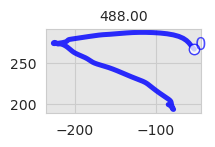

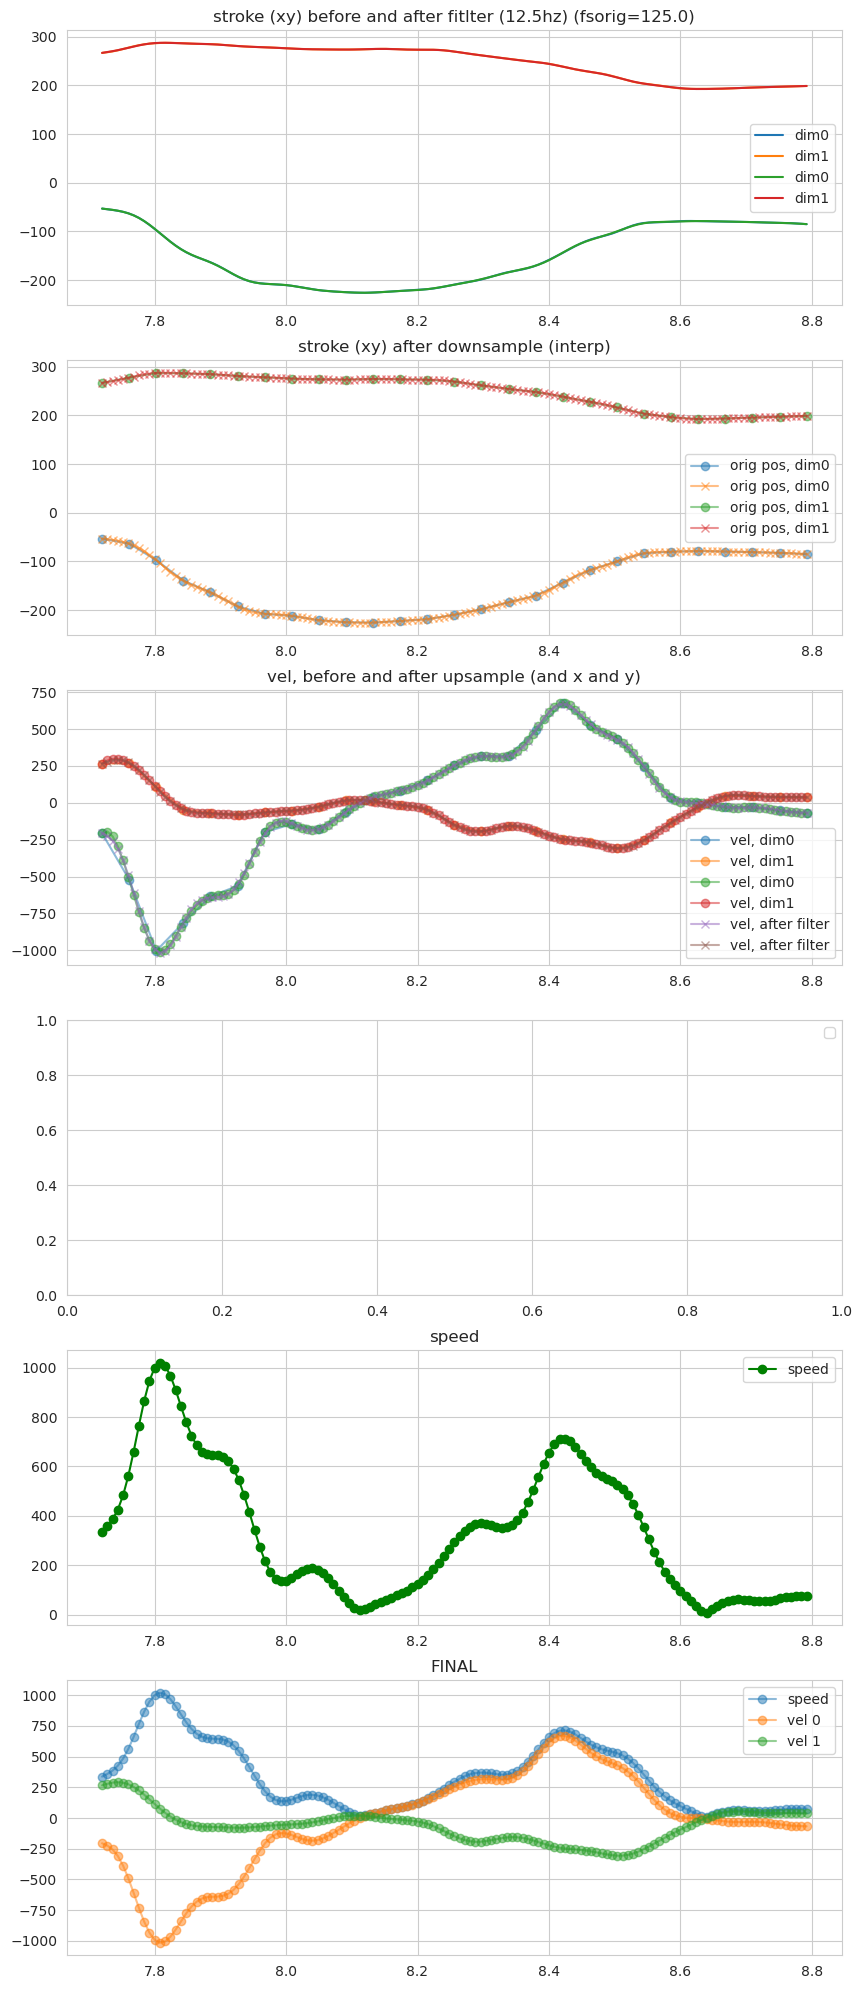

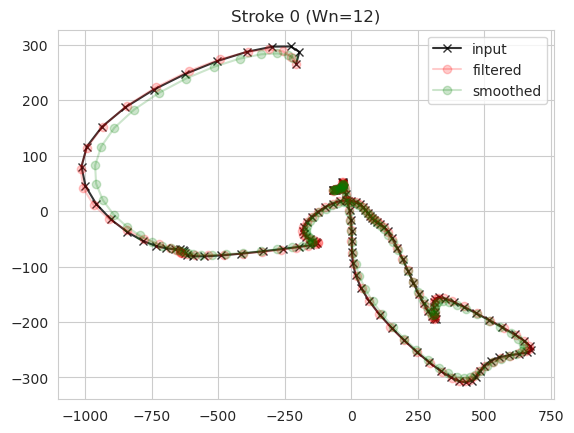

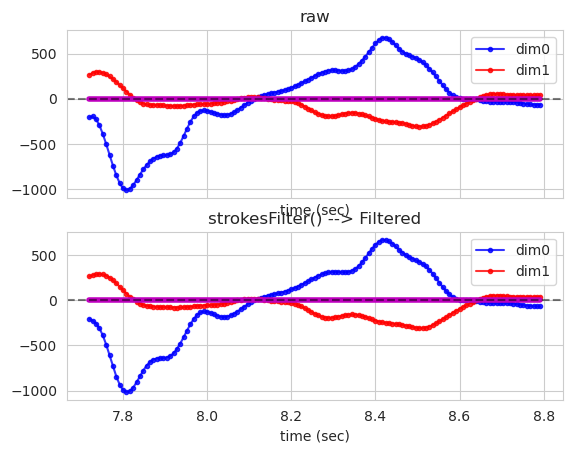

In [18]:
import random
i1 = random.choice(range(len(DS.Dat)))

# DS.extract_strokes_as_velocity_debug(i1, lowpass_freq_force = 5)
DS.extract_strokes_as_velocity_debug(i1, lowpass_freq_force = None)
# DS.extract_strokes_as_velocity_debug(i1, lowpass_freq_force = 15)

In [ ]:
strokesFilter([strok1, strok2], [None, 20], fs, plotresponse=True, plotprepost=True)


In [ ]:
from pythonlib.tools.stroketools import strokesFilter
i = 100
strokes = D.Dat.iloc[i]["strokes_beh"]
fs = D.get_sample_rate_alltrials()
strokesFilter(strokes, [None, 20], fs, plotresponse=True, plotprepost=True)


In [ ]:
# TODO:

# Penalty for large aligments, use Amerced DTW (https://www.sciencedirect.com/science/article/pii/S0031320323000341?via%3Dihub#bib0008)
# - what additive penalty? should base this on natural variation for the same stroke in same context, and
# use squared dist, so that larger penalty for going outside this range.

# Try different variations:
# - resample timepoints before computing velocity (i.e., invariant to speed)
# - rescale in space (this can be problematic...)
# - do both velocity and position:
# -- for position, do both recenter at onset and at center.

# 0) Read what people have done for gesture detection
# 1) wrapper to compute each of these variations (strok1, strok2) --> scalar
# 2) Test each variation:
# -- Plot example similarity matrix using each of these metrics
# ---- Goal: good separation for within category (shape/location) vs. between category.
# 3) Tke average over all variations.

# DO: for each "basis stroke" compute its distance against itself across trials. Then use this to 
# normalize scores against other strokes


##### Developing stroke distance wrapper

In [ ]:
fs = D.get_sample_rate_alltrials()

In [ ]:
from pythonlib.tools.distfunctools import distStrokWrapper

distStrokWrapper(strok1, strok2, 
                 ver="dtw_vels",
                 align_to_center=False,
                 align_to_onset=True,
                 rescale_ver="stretch_to_1",
                 interp_to_ignore_time=True,
                 fs = fs
                )

##### Coarticulation

### OTHER STUFF

In [ ]:
for ind in range(len(D.Dat)):
    tmp = D.sequence_compute_each_task_stroke_only_one_beh(ind)
    D.Dat[""]
    if tmp==False:
        print(ind, tmp)

In [ ]:
# make prim plots, but split by epoch

In [ ]:
# quantify: prim visual similarity.

In [ ]:
# compare: stim vs. no stim.

In [ ]:
# quantify: prim stats

In [ ]:
# Plots of movement velocity over time

In [ ]:
# See the plots for prim categories expt

In [ ]:
# Distance from base set of prims.